In [2]:
!pip install shap



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv("combined_netcdf_data.csv")

# Compute wind speed
df["wind_speed"] = np.sqrt(df["u"]**2 + df["v"]**2)
df.dropna(inplace=True)

# Clean data
df = df.drop(columns=["u", "v"])
df = df.select_dtypes(include=[np.number])

# Features and target
X = df.drop(columns=["wind_speed"])
y = df["wind_speed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
start_rf = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_rf

# Feature selection
importances = rf_model.feature_importances_
important_features = X.columns[importances >= 0.02]
print("Selected Features (Importance ≥ 0.02):", list(important_features))

# Filter features
X_filtered = X[important_features]
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Retrain RF on filtered features
start_rf2 = time.time()
filtered_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
filtered_model.fit(X_train_filt, y_train_filt)
rf_filtered_time = time.time() - start_rf2
y_pred_rf = filtered_model.predict(X_test_filt)

# Evaluate RF
print("\n🔹 Random Forest:")
print("Time Taken: {:.2f} seconds".format(rf_filtered_time))
print("R² Score:", r2_score(y_test_filt, y_pred_rf))
print("MSE:", mean_squared_error(y_test_filt, y_pred_rf))

# SHAP for RF
# explainer = shap.Explainer(filtered_model, X_train_filt)
# shap_values = explainer(X_train_filt)
# shap.plots.bar(shap_values, max_display=len(important_features))
# plt.title("SHAP Feature Importance - Random Forest")
# plt.tight_layout()
# plt.show()



Selected Features (Importance ≥ 0.02): ['latitude', 'longitude', 'd', 'z', 'r', 'q', 'crwc', 't', 'w', 'vo']

🔹 Random Forest:
Time Taken: 33.19 seconds
R² Score: 0.7565699927520787
MSE: 2.3872250657567613



🔹 XGBoost:
Time Taken: 0.85 seconds
R² Score: 0.6475419451453337
MSE: 3.4564214686976142


100%|===================| 175037/175200 [09:29<00:00]        

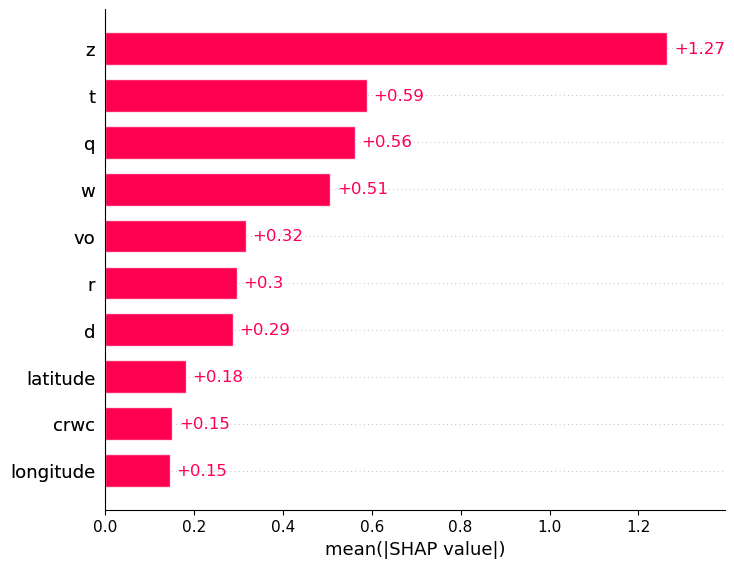

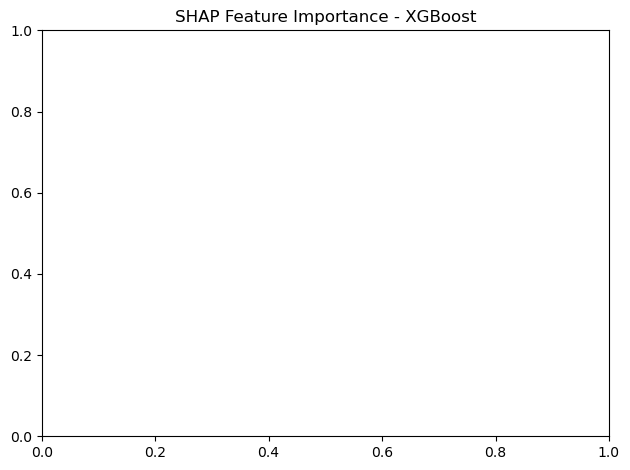

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import time
start_xgb = time.time()
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_filt, y_train_filt)
xgb_time = time.time() - start_xgb
y_pred_xgb = xgb_model.predict(X_test_filt)

# Evaluate
print("\n🔹 XGBoost:")
print("Time Taken: {:.2f} seconds".format(xgb_time))
print("R² Score:", r2_score(y_test_filt, y_pred_xgb))
print("MSE:", mean_squared_error(y_test_filt, y_pred_xgb))

# SHAP for XGBoost
explainer_xgb = shap.Explainer(xgb_model, X_train_filt)
shap_values_xgb = explainer_xgb(X_train_filt)
shap.plots.bar(shap_values_xgb, max_display=len(important_features))
plt.title("SHAP Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv("combined_netcdf_data.csv")

# Compute wind speed
df["wind_speed"] = np.sqrt(df["u"]**2 + df["v"]**2)
df.dropna(inplace=True)
                           
                          


# Clean data
df = df.drop(columns=["u", "v"])
df = df.select_dtypes(include=[np.number])

# Features and target
X = df.drop(columns=["wind_speed"])
y = df["wind_speed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
start_rf = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_time = time.time() - start_rf

# Feature selection
importances = rf_model.feature_importances_
important_features = X.columns[importances >= 0.02]
print("Selected Features (Importance ≥ 0.02):", list(important_features))

# Filter features
X_filtered = X[important_features]
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Retrain RF on filtered features
start_rf2 = time.time()
filtered_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
filtered_model.fit(X_train_filt, y_train_filt)
rf_filtered_time = time.time() - start_rf2
y_pred_rf = filtered_model.predict(X_test_filt)

# Evaluate RF
print("\n🔹 Random Forest:")
print("Time Taken: {:.2f} seconds".format(rf_filtered_time))
print("R² Score:", r2_score(y_test_filt, y_pred_rf))
print("MSE:", mean_squared_error(y_test_filt, y_pred_rf))


# SHAP for RF
# explainer = shap.Explainer(filtered_model, X_train_filt)
# shap_values = explainer(X_train_filt)
# shap.plots.bar(shap_values, max_display=len(important_features))
# plt.title("SHAP Feature Importance - Random Forest")
# plt.tight_layout()
# plt.show()


# ====================
# ✅ XGBoost Model
# ====================
start_xgb = time.time()
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_filt, y_train_filt)
xgb_time = time.time() - start_xgb
y_pred_xgb = xgb_model.predict(X_test_filt)

# Evaluate
print("\n🔹 XGBoost:")
print("Time Taken: {:.2f} seconds".format(xgb_time))
print("R² Score:", r2_score(y_test_filt, y_pred_xgb))
print("MSE:", mean_squared_error(y_test_filt, y_pred_xgb))

# SHAP for XGBoost
# explainer_xgb = shap.Explainer(xgb_model, X_train_filt)
# shap_values_xgb = explainer_xgb(X_train_filt)
# shap.plots.bar(shap_values_xgb, max_display=len(important_features))
# plt.title("SHAP Feature Importance - XGBoost")
# plt.tight_layout()
# plt.show()


Selected Features (Importance ≥ 0.02): ['latitude', 'longitude', 'd', 'z', 'r', 'q', 'crwc', 't', 'w', 'vo']

🔹 Random Forest:
Time Taken: 29.35 seconds
R² Score: 0.7565699927520787
MSE: 2.3872250657567613

🔹 XGBoost:
Time Taken: 0.62 seconds
R² Score: 0.6475419451453337
MSE: 3.4564214686976142


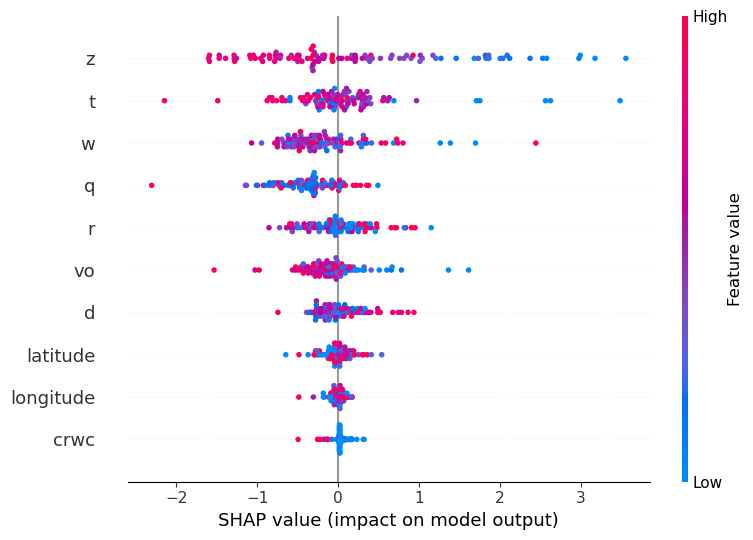

In [6]:
import shap

explainer = shap.TreeExplainer(filtered_model)

# Limit to 100 samples
shap_sample = X_train_filt.sample(100, random_state=42)
shap_values = explainer.shap_values(shap_sample)

shap.summary_plot(shap_values, shap_sample)


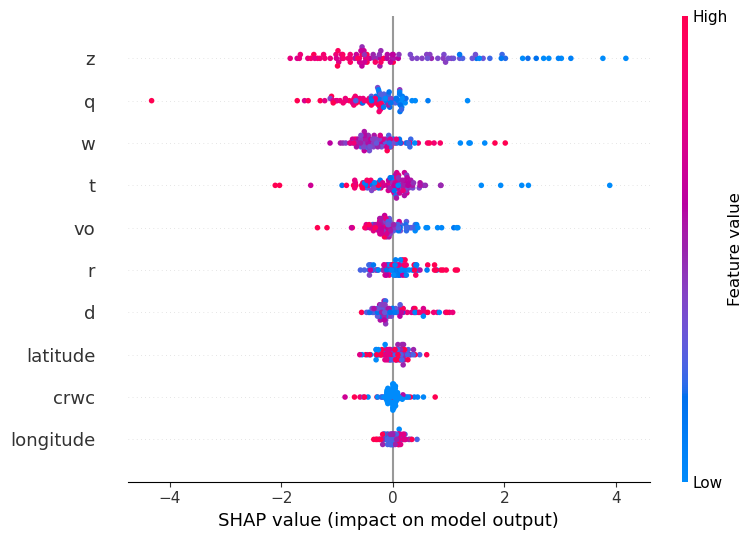

In [7]:
import shap

explainer_xgb = shap.TreeExplainer(xgb_model)

# Limit to 100 samples
shap_sample_xgb = X_train_filt.sample(100, random_state=42)
shap_values_xgb = explainer_xgb.shap_values(shap_sample_xgb)

shap.summary_plot(shap_values_xgb, shap_sample_xgb)


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 7.0129 - val_loss: 4.9837
Epoch 2/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 4.8794 - val_loss: 4.5499
Epoch 3/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.4844 - val_loss: 4.2712
Epoch 4/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.2430 - val_loss: 4.0254
Epoch 5/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.0241 - val_loss: 4.0648
Epoch 6/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.9350 - val_loss: 3.8898
Epoch 7/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.7928 - val_loss: 3.7685
Epoch 8/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 3.6986 - val_loss: 3.7552
Epoch 9/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.6032 - val_loss: 3.7316
Epoch 10/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3.5259 - val_loss: 3.5941
Epoch 11/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.4468 - val_loss: 3.5385
Epoch 12/100
4380/

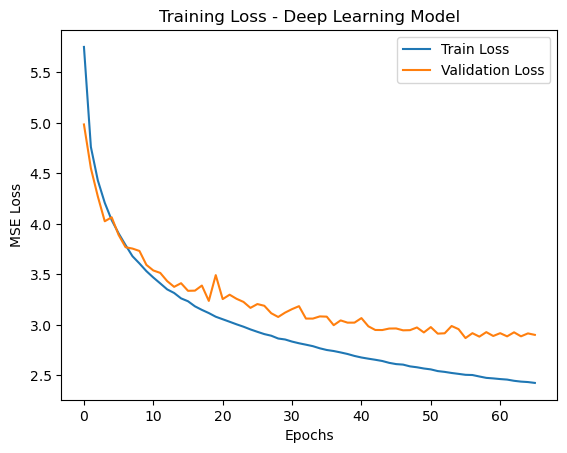

In [8]:
start_dl = time.time()

# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filt)
X_test_scaled = scaler.transform(X_test_filt)

# Build model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_filt,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict and evaluate
y_pred_dl = model.predict(X_test_scaled).flatten()
dl_time = time.time() - start_dl

print("\n🔹 Deep Learning Model:")
print("Time Taken: {:.2f} seconds".format(dl_time))
print("R² Score:", r2_score(y_test_filt, y_pred_dl))
print("MSE:", mean_squared_error(y_test_filt, y_pred_dl))

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training Loss - Deep Learning Model")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,597 (807.02 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,732 (538.02 KB)


🔧 Model Summary:


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,865 (269.00 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 0 (0.00 B)


Trainable Parameters: 68865
Non-trainable Parameters: 0.0
Total Parameters: 68865.0
Epoch 1/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 6.8433 - r2_score_metric: 0.2328 - val_loss: 4.9540 - val_r2_score_metric: 0.4327
Epoch 2/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.8574 - r2_score_metric: 0.4613 - val_loss: 4.4606 - val_r2_score_metric: 0.4877
Epoch 3/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.4827 - r2_score_metric: 0.4932 - val_loss: 4.1876 - val_r2_score_metric: 0.5210
Epoch 4/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.2066 - r2_score_metric: 0.5235 - val_loss: 4.0586 - val_r2_score_metric: 0.5326
Epoch 5/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.0325 - r2_score_metric: 0.5416 - val_loss: 4.0401 - val_r2_score_metric: 0.5350
Epoch 6/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.9170 - r2_score_metric: 0.5584 - val_loss: 3.8779 - val_r2_score_metric: 0.5519
Epoch 7/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8

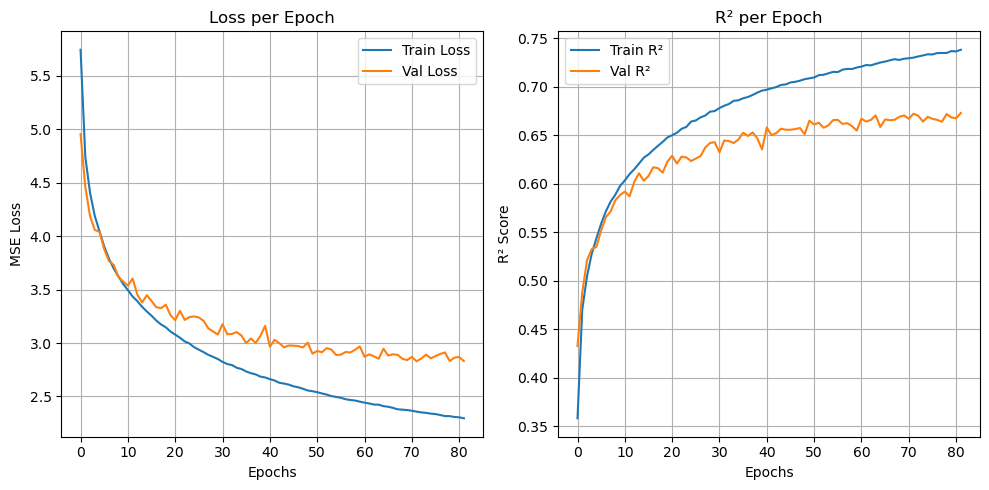

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# ⏱️ Start timer
start_dl = time.time()

# 🔄 Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filt)
X_test_scaled = scaler.transform(X_test_filt)

# 🧠 Custom R² metric for Keras
def r2_score_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# 🧠 Build the model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))

# 📊 Model Summary
print("\n🔧 Model Summary:")
model.summary()

# 🔢 Count Parameters
trainable_params = np.sum([np.prod(w.shape) for w in model.trainable_weights])
non_trainable_params = np.sum([np.prod(w.shape) for w in model.non_trainable_weights])
print(f"\nTrainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")
print(f"Total Parameters: {trainable_params + non_trainable_params}")

# ⚙️ Compile the model with R² metric
model.compile(optimizer='adam', loss='mse', metrics=[r2_score_metric])

# 🛑 Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# 🚀 Train the model
history = model.fit(
    X_train_scaled, y_train_filt,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1  # Shows loss and R² at each epoch
)

# 📋 Print epoch-wise metrics
print("\n📋 Epoch-wise Summary:")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1:02d}/{len(history.history['loss'])} - "
          f"loss: {history.history['loss'][i]:.4f} - "
          f"r_square: {history.history['r2_score_metric'][i]:.4f} - "
          f"val_loss: {history.history['val_loss'][i]:.4f} - "
          f"val_r_square: {history.history['val_r2_score_metric'][i]:.4f}")

# 🔮 Predict on test set
y_pred_dl = model.predict(X_test_scaled).flatten()
dl_time = time.time() - start_dl

# 🧪 Final evaluation on test set
test_mse = mean_squared_error(y_test_filt, y_pred_dl)
test_r2 = r2_score(y_test_filt, y_pred_dl)

print("\n🔹 Deep Learning Model Results:")
print("⏱️ Time Taken: {:.2f} seconds".format(dl_time))
print(f"📐 Test R² Score: {test_r2:.4f}")
print(f"🧪 Test MSE: {test_mse:.4f}")

# 📈 Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)

# 📈 Plot R² score per epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score_metric'], label='Train R²')
plt.plot(history.history['val_r2_score_metric'], label='Val R²')
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("R² per Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,597 (807.02 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,732 (538.02 KB)


🔧 Model Summary:


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,825 (429.00 KB)

 Trainable params: 109,825 (429.00 KB)

 Non-trainable params: 0 (0.00 B)


Trainable Parameters: 109825
Non-trainable Parameters: 0.0
Total Parameters: 109825.0
Epoch 1/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 6.6816 - r2_score_metric: 0.2572 - val_loss: 4.8107 - val_r2_score_metric: 0.4498
Epoch 2/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.6362 - r2_score_metric: 0.4823 - val_loss: 4.3705 - val_r2_score_metric: 0.4951
Epoch 3/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 4.2468 - r2_score_metric: 0.5203 - val_loss: 4.2320 - val_r2_score_metric: 0.5182
Epoch 4/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 4.0674 - r2_score_metric: 0.5428 - val_loss: 3.8964 - val_r2_score_metric: 0.5521
Epoch 5/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 3.8516 - r2_score_metric: 0.5602 - val_loss: 3.8310 - val_r2_score_metric: 0.5624
Epoch 6/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 3.6693 - r2_score_metric: 0.5853 - val_loss: 3.5483 - val_r2_score_metric: 0.5930
Epoch 7/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 

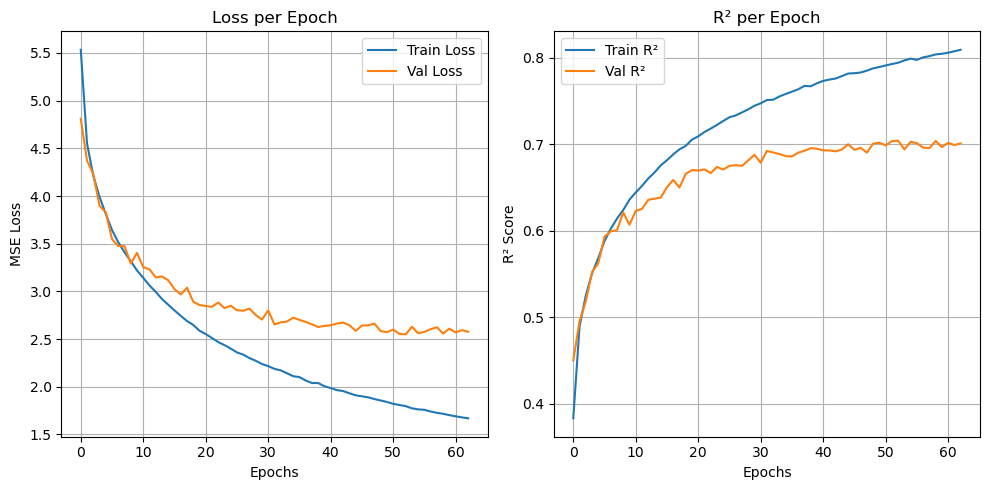

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K

# ⏱️ Start timer
start_dl = time.time()

# 🔄 Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filt)
X_test_scaled = scaler.transform(X_test_filt)

# 🧠 Custom R² metric for Keras
def r2_score_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# 🧠 Build the model with 2 additional layers
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))  # ➕ New layer
model.add(Dense(64, activation='relu'))   # ➕ New layer
model.add(Dense(1))

# 📊 Model Summary
print("\n🔧 Model Summary:")
model.summary()

# 🔢 Count Parameters
trainable_params = np.sum([np.prod(w.shape) for w in model.trainable_weights])
non_trainable_params = np.sum([np.prod(w.shape) for w in model.non_trainable_weights])
print(f"\nTrainable Parameters: {trainable_params}")
print(f"Non-trainable Parameters: {non_trainable_params}")
print(f"Total Parameters: {trainable_params + non_trainable_params}")

# ⚙️ Compile the model with R² metric
model.compile(optimizer='adam', loss='mse', metrics=[r2_score_metric])

# 🛑 Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# 🚀 Train the model
history = model.fit(
    X_train_scaled, y_train_filt,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 📋 Print epoch-wise metrics
print("\n📋 Epoch-wise Summary:")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1:02d}/{len(history.history['loss'])} - "
          f"loss: {history.history['loss'][i]:.4f} - "
          f"r_square: {history.history['r2_score_metric'][i]:.4f} - "
          f"val_loss: {history.history['val_loss'][i]:.4f} - "
          f"val_r_square: {history.history['val_r2_score_metric'][i]:.4f}")

# 🔮 Predict on test set
y_pred_dl = model.predict(X_test_scaled).flatten()
dl_time = time.time() - start_dl

# 🧪 Final evaluation on test set
test_mse = mean_squared_error(y_test_filt, y_pred_dl)
test_r2 = r2_score(y_test_filt, y_pred_dl)

print("\n🔹 Deep Learning Model Results:")
print("⏱️ Time Taken: {:.2f} seconds".format(dl_time))
print(f"📐 Test R² Score: {test_r2:.4f}")
print(f"🧪 Test MSE: {test_mse:.4f}")

# 📈 Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)

# 📈 Plot R² score per epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score_metric'], label='Train R²')
plt.plot(history.history['val_r2_score_metric'], label='Val R²')
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("R² per Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [13]:
pip install keras-tuner --upgrade


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Trial 10 Complete [00h 14m 26s]
val_r2_score_metric: 0.7106550931930542

Best val_r2_score_metric So Far: 0.731421947479248
Total elapsed time: 01h 32m 55s

✅ Best Hyperparameters:
units_input: 384
num_hidden_layers: 4
units_0: 128
optimizer: sgd
units_1: 256
units_2: 64
units_3: 224
Epoch 1/100


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.2701 - r2_score_metric: 0.8536 - val_loss: 2.3217 - val_r2_score_metric: 0.7297
Epoch 2/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.2499 - r2_score_metric: 0.8552 - val_loss: 2.3836 - val_r2_score_metric: 0.7218
Epoch 3/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.2645 - r2_score_metric: 0.8538 - val_loss: 2.3444 - val_r2_score_metric: 0.7263
Epoch 4/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.2591 - r2_score_metric: 0.8543 - val_loss: 2.3296 - val_r2_score_metric: 0.7296
Epoch 5/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1.2466 - r2_score_metric: 0.8563 - val_loss: 2.2958 - val_r2_score_metric: 0.7337
Epoch 6/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.2436 - r2_score_metric: 0.8574 - val_loss: 2.3605 - val_r2_score_metric: 0.7242
Epoch 7/100
4380/4380 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1.2072 - r2_score_metric: 0.8610 - val_loss: 2.3088 - val_r2_score_metric: 0.73

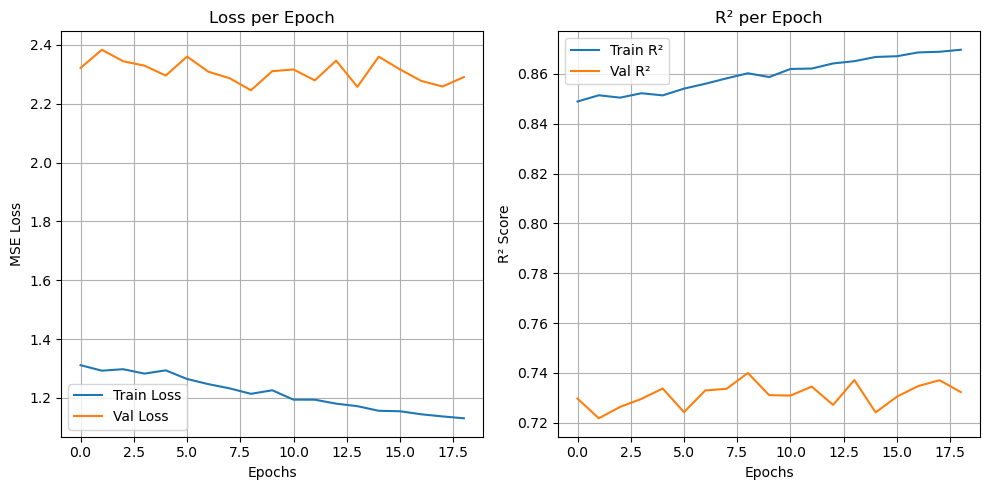

In [15]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
from keras_tuner import RandomSearch, Objective

# ⏱️ Start timer
start_dl = time.time()

# 🔄 Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filt)
X_test_scaled = scaler.transform(X_test_filt)

# 🧠 Custom R² metric
def r2_score_metric(y_true, y_pred):
    ss_res = K.sum(K.square(y_true - y_pred))
    ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return 1 - ss_res / (ss_tot + K.epsilon())

# 🔧 Hypermodel function
def build_model(hp):
    model = Sequential()
    
    # Input layer
    model.add(Dense(
        units=hp.Int('units_input', min_value=64, max_value=512, step=64),
        activation='relu',
        input_shape=(X_train_scaled.shape[1],)
    ))
    
    # Variable number of hidden layers
    for i in range(hp.Int('num_hidden_layers', 1, 4)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))

    # Output layer
    model.add(Dense(1))

    # Optimizer choice
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])

    model.compile(optimizer=optimizer_choice,
                  loss='mse',
                  metrics=[r2_score_metric])
    
    return model

# 🔍 Keras Tuner setup with explicit objective direction
tuner = RandomSearch(
    build_model,
    objective=Objective("val_r2_score_metric", direction="max"),  # maximize R²
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='dl_regression_tuning'
)

# 🛑 Early stopping
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# 🔍 Run hyperparameter search
tuner.search(X_train_scaled, y_train_filt,
             validation_split=0.2,
             epochs=100,
             batch_size=32,
             callbacks=[early_stop],
             verbose=1)

# ✅ Retrieve best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hp = tuner.get_best_hyperparameters()[0]

print("\n✅ Best Hyperparameters:")
for param in best_hp.values:
    print(f"{param}: {best_hp.values[param]}")

# 🔁 Retrain best model (optional, but good for consistent history tracking)
history = best_model.fit(
    X_train_scaled, y_train_filt,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 🔮 Predict on test set
y_pred_dl = best_model.predict(X_test_scaled).flatten()
dl_time = time.time() - start_dl

# 🧪 Final evaluation
test_mse = mean_squared_error(y_test_filt, y_pred_dl)
test_r2 = r2_score(y_test_filt, y_pred_dl)

print("\n🔹 Tuned Deep Learning Model Results:")
print("⏱️ Time Taken: {:.2f} seconds".format(dl_time))
print(f"📐 Test R² Score: {test_r2:.4f}")
print(f"🧪 Test MSE: {test_mse:.4f}")

# 📈 Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Loss per Epoch")
plt.legend()
plt.grid(True)

# 📈 Plot R² score per epoch
plt.subplot(1, 2, 2)
plt.plot(history.history['r2_score_metric'], label='Train R²')
plt.plot(history.history['val_r2_score_metric'], label='Val R²')
plt.xlabel("Epochs")
plt.ylabel("R² Score")
plt.title("R² per Epoch")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
best_model = tuner.get_best_models(num_models=1)[0]


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_best = best_model.predict(X_test_scaled).flatten()

# Compute metrics
test_mse = mean_squared_error(y_test_filt, y_pred_best)
test_r2 = r2_score(y_test_filt, y_pred_best)

print(f"✅ True Best Model Test R²: {test_r2:.4f}")
print(f"✅ True Best Model Test MSE: {test_mse:.4f}")


1369/1369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
✅ True Best Model Test R²: 0.7690
✅ True Best Model Test MSE: 2.2656


In [18]:
best_model.save("best_dl_model.h5")
